### Rice FinTech Bootcamp | Homework #3 | Pandas | Eric Siebert 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
wr_port = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
wr_columns = ["Soros","Paulson", "Tiger", "Berkshire"]
wr_port.columns = wr_columns
wr_port.head(5)

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wr_port.isnull().sum()

Soros        1
Paulson      1
Tiger        1
Berkshire    1
dtype: int64

In [4]:
# Drop nulls
wr_port = wr_port.dropna().copy()
wr_port.head(5)

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
ar_port = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
ar_port.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [6]:
# Count nulls
ar_port.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
ar_port = ar_port.dropna().copy()
ar_columns = ["Algo1","Algo2"]
ar_port.columns = ar_columns
ar_port.head()

,Algo1,Algo2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp_port = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_port.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp_port.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_port['Close'] = sp_port['Close'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
sp_port.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp_port = sp_port.pct_change()
sp_port

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
sp_port = sp_port.dropna().copy()
sp_port.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
sp_port = sp_port.rename(columns={"Close": "S&P_500"})
sp_port.head()

,S&P_500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_port = pd.concat([wr_port, ar_port, sp_port], axis="columns", join="inner")
combined_port.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis
Calculate and visualize performance and risk metrics for the portfolios.

In [15]:
# Calculate cumulative returns.
cum_ret = (1 + combined_port).cumprod() - 1
cum_ret.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


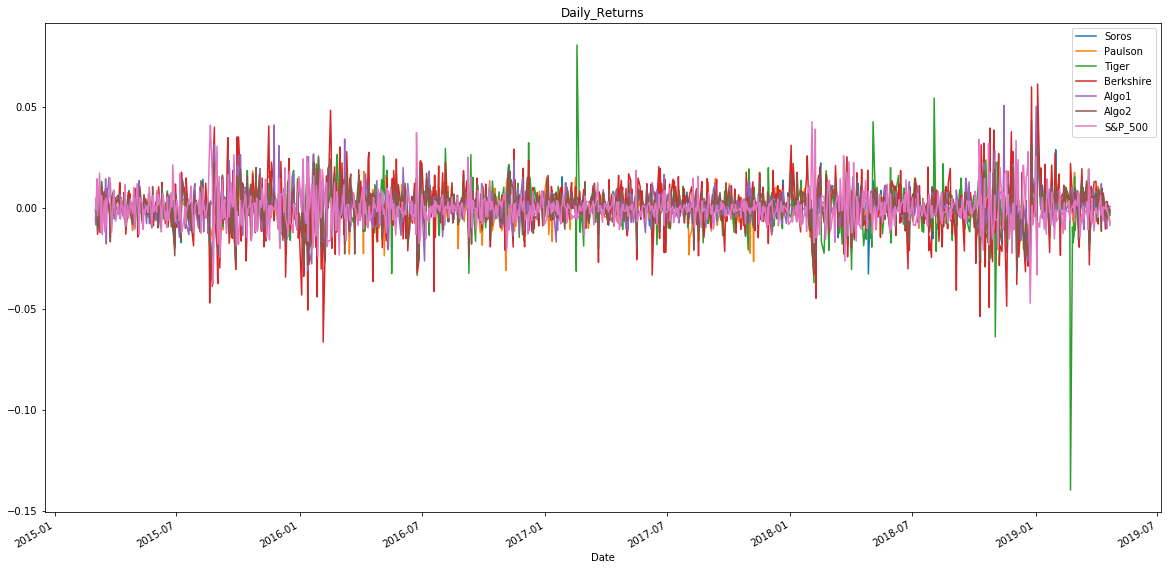

In [16]:
# Plot daily returns
combined_port.plot(kind="line",figsize=(20,10),title="Daily_Returns");

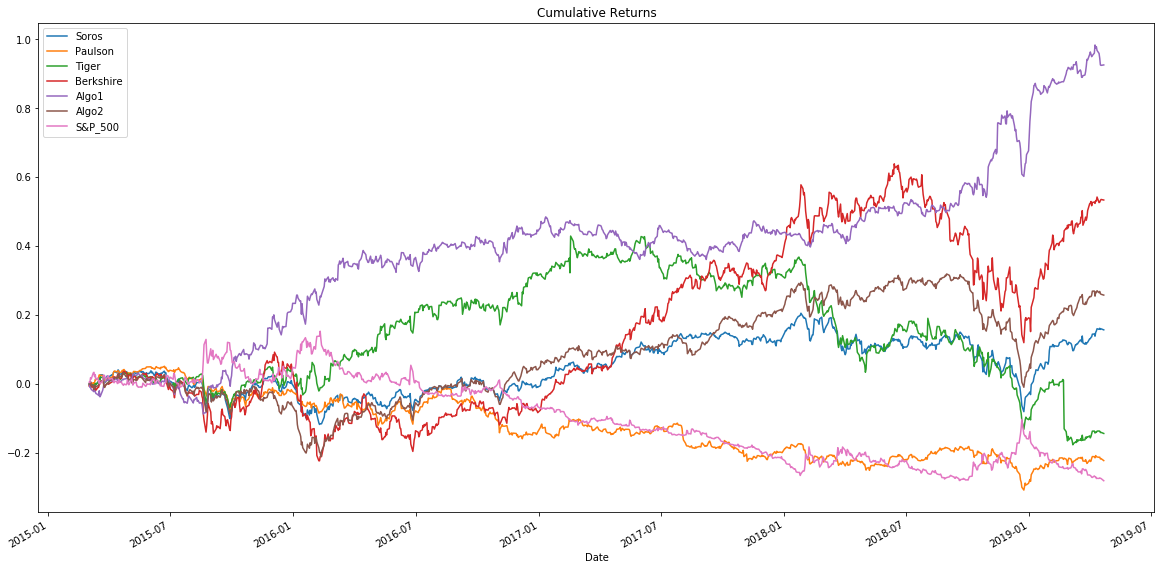

In [17]:
# Plot cumulative returns
cum_ret.plot(kind='line',figsize=(20,10),title='Cumulative Returns');

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

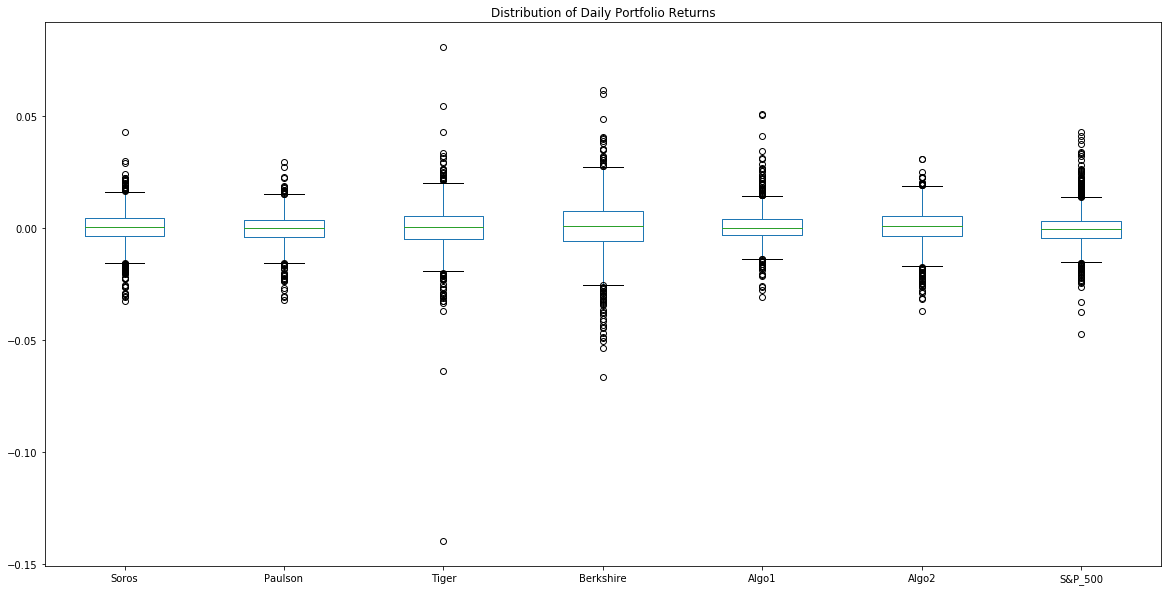

In [18]:
# Box plot to visually show risk
combined_port.plot(kind='box', figsize=(20,10),title='Distribution of Daily Portfolio Returns');

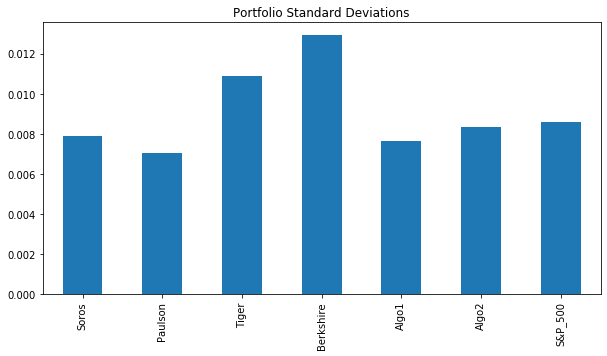

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
std_combined = np.std(combined_port)
std_combined.plot(kind='bar',figsize=(10,5),title='Portfolio Standard Deviations');

In [20]:
# Determine which portfolios are riskier than the S&P 500
print(std_combined)
# Tiger & Berkshire both have higher standard deviation of returns vs. the S&P 500

Soros        0.007892
Paulson      0.007022
Tiger        0.010892
Berkshire    0.012913
Algo1        0.007619
Algo2        0.008337
S&P_500      0.008583
dtype: float64


Soros        0.125288
Paulson      0.111473
Tiger        0.172906
Berkshire    0.204980
Algo1        0.120948
Algo2        0.132349
S&P_500      0.136247
dtype: float64


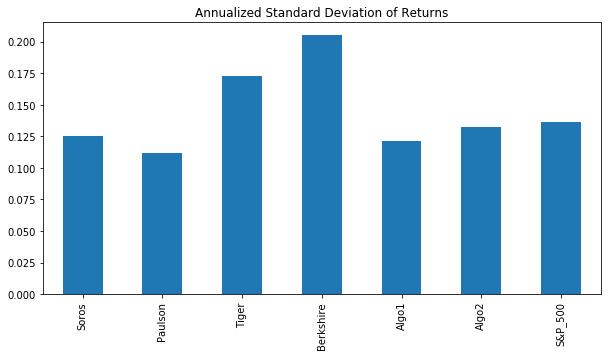

In [21]:
# Calculate the annualized standard deviation (252 trading days)
std_annual = std_combined * np.sqrt(252)
std_annual.plot(kind='bar',figsize=(10,5),title='Annualized Standard Deviation of Returns');
print(std_annual)
# Again, Tiger & Berkshire had a higher annualized standard deviation of returns vs. the S&P 500

## *Rolling Statistics*
### Risk changes over time. Analyze the rolling statistics for Risk and Beta. 


##### 1) Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

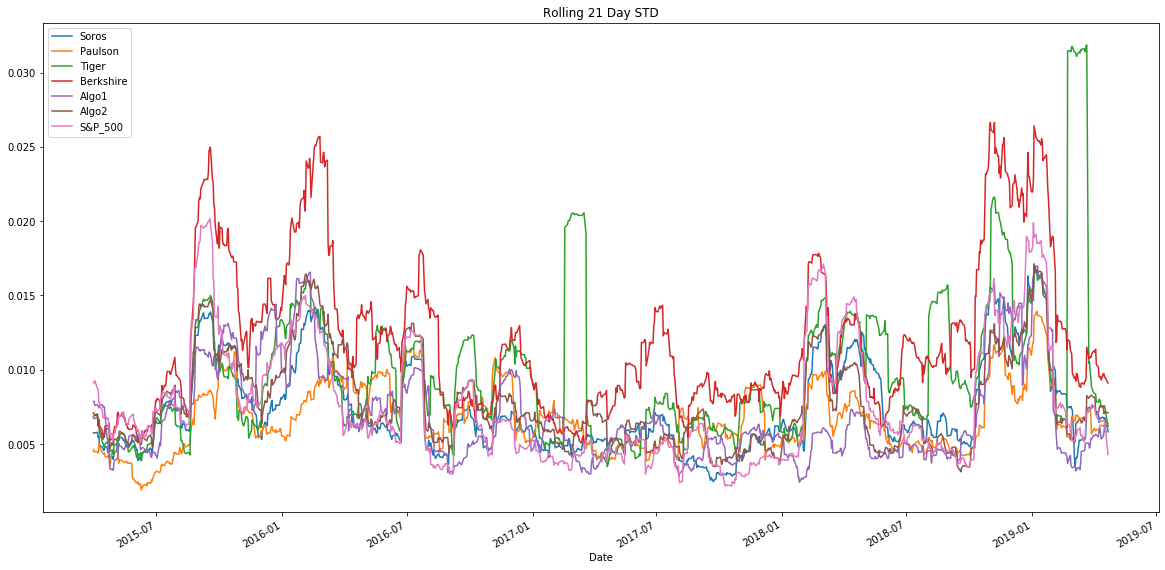

In [22]:
combined_port.rolling(window=21).std().plot(kind='line',figsize=(20,10),title='Rolling 21 Day STD');

##### 2) Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

In [23]:
combined_port_cor = combined_port.corr()
combined_port_cor

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,S&P_500
Soros,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
Berkshire,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P_500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


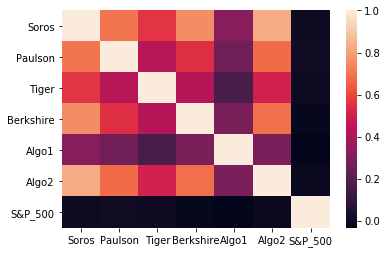

In [24]:
sns.heatmap(combined_port_cor);
# I am very surprised that none of the portfolios were remotely correlated to the S&P 500 (i.e. above .5). I am wondering if I completed the step correctly.

##### 3) Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

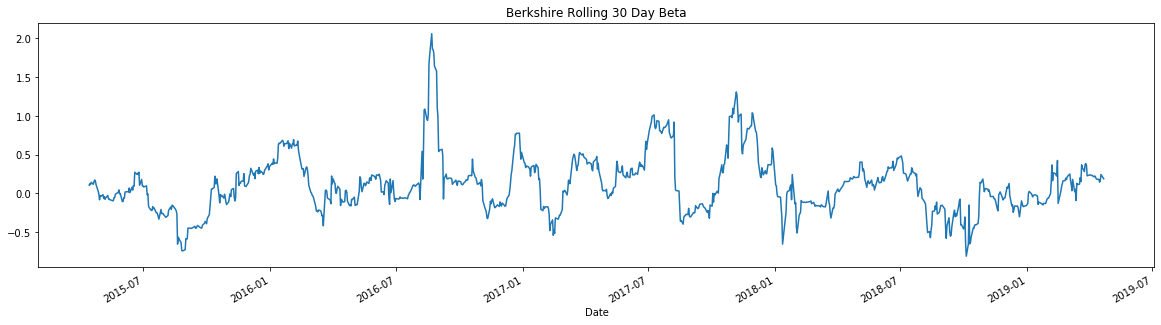

In [25]:
berk_roll_cov_30 = combined_port['Berkshire'].rolling(window=30).cov(combined_port['S&P_500'])
sp500_roll_var_30 = combined_port['S&P_500'].rolling(window=30).var()
berk_roll_beta = berk_roll_cov_30 / sp500_roll_var_30 
berk_roll_beta.plot(kind='line',figsize=(20,5),title='Berkshire Rolling 30 Day Beta');

##### 4) An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

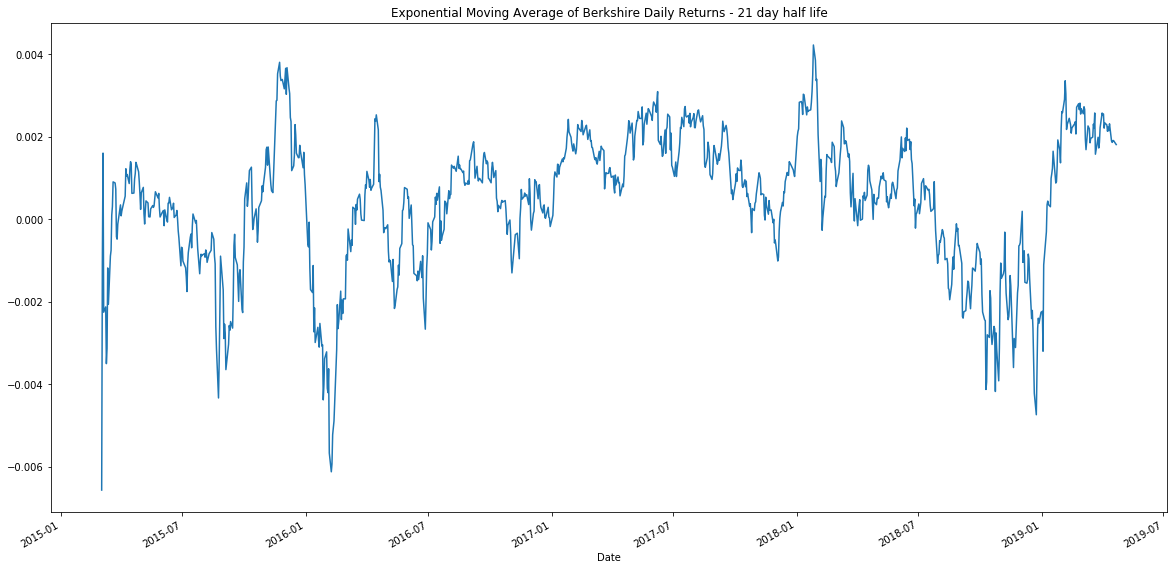

In [26]:
combined_port['Berkshire'].ewm(halflife=21).mean().plot(kind='line',figsize=(20,10),title='Exponential Moving Average of Berkshire Daily Returns - 21 day half life');